# K Neighbours regression to predict bike availability

In [55]:
import matplotlib.pyplot as plt
import pylab
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold, train_test_split
from sklearn.neighbors import KNeighborsRegressor

import functions.ml_functions as ml
import functions.misc_functions as misc
import functions.metrics as mtr

In [56]:
ten1 = pd.read_csv('data/ten_min.csv')
ten2 = pd.read_csv('data/ten_min_2.csv')
thirty1 = pd.read_csv('data/thirty_min.csv')
thirty2 = pd.read_csv('data/thirty_min_2.csv')
sixty1 = pd.read_csv('data/sixty_min.csv')
sixty2 = pd.read_csv('data/sixty_min_2.csv')

In [57]:
df1 = ten1
df2 = ten2
df3 = thirty1
df4 = thirty2
df5 = sixty1
df6 = sixty2

In [58]:
df1

,Unnamed: 0,AVAILABLE BIKES,t,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,B10,B15,B20,B25,B30,DB1,DB2,DDB1DB2
0,6,22,0.020833,0,1,0,0,0,0,0,23,23,23,23,23,0,0,0
1,7,22,0.024306,0,1,0,0,0,0,0,22,23,23,23,23,1,0,-1
2,8,22,0.027778,0,1,0,0,0,0,0,22,22,23,23,23,0,1,1
3,9,23,0.031250,0,1,0,0,0,0,0,22,22,22,23,23,0,0,0
4,10,23,0.034722,0,1,0,0,0,0,0,22,22,22,22,23,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17980,17986,14,0.982639,0,1,0,0,0,0,0,14,14,14,14,14,0,0,0
17981,17987,14,0.986111,0,1,0,0,0,0,0,14,14,14,14,14,0,0,0
17982,17988,14,0.989583,0,1,0,0,0,0,0,14,14,14,14,14,0,0,0
17983,17989,14,0.993056,0,1,0,0,0,0,0,14,14,14,14,14,0,0,0


In [59]:
def stack_features(df:pd.DataFrame):
    X1 = df.iloc[:, 2]
    X2 = df.iloc[:, 3]
    X3 = df.iloc[:, 4]
    X4 = df.iloc[:, 5]
    X5 = df.iloc[:, 6]
    X6 = df.iloc[:, 7]
    X7 = df.iloc[:,8]
    X8 = df.iloc[:, 9]
    X9 = df.iloc[:, 10]
    X10 = df.iloc[:, 11]
    X11 = df.iloc[:, 12]
    X12 = df.iloc[:,13]
    X13 = df.iloc[:, 14]
    X14 = df.iloc[:, 15]
    X15 = df.iloc[:,16]
    X16 = df.iloc[:, 17]
    X = np.column_stack((X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14, X15, X16))

    Y = df.iloc[:, 1]
    return X, Y

In [60]:
X1, Y1 =stack_features(df1) 
X2, Y2 = stack_features(df2)
X3, Y3 =stack_features(df3) 
X4, Y4 = stack_features(df4)
X5, Y5 =stack_features(df5) 
X6, Y6 = stack_features(df6)


In [61]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, Y1, test_size=0.3, random_state=42)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, Y2, test_size=0.3, random_state=42)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, Y3, test_size=0.3, random_state=42)
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, Y4, test_size=0.3, random_state=42)
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, Y5, test_size=0.3, random_state=42)
X6_train, X6_test, y6_train, y6_test = train_test_split(X6, Y6, test_size=0.3, random_state=42)

In [62]:
def Kfold_for_n_neighbours(X_features, y_features, n_range, title:str):


    error_array = np.zeros(len(n_range))
    std_dev_array = np.zeros(len(n_range))
    for i in range(len(n_range)):
        # print("\n\n C = %f"%(C_range[i]))
        model = KNeighborsRegressor(n_neighbors=n_range[i]).fit(X_features, y_features)
        kf = KFold(n_splits=5)
        errs = []

        for train, test in kf.split(X_features):
            model.fit(X_features[train],y_features[train])
            ypred = model.predict(X_features[test])
            from sklearn.metrics import mean_squared_error
            # print("square error %f"%(mean_squared_error(y_features[test],ypred)))
            errs.append(mean_squared_error(y_features[test],ypred))
        
        error_array[i] = np.mean(errs)
        std_dev_array[i] = np.std(errs)

    # print(error_array)

    plt.figure(title)
    plt.errorbar(n_range, error_array, yerr=std_dev_array)
    plt.xlabel('No Neighbors')
    plt.ylabel('Mean Squared Error')
    plt.title(title)
    # x = np.arange(len(error_array))
    # plt.bar(x, C_range, error_array)

In [63]:
def Kfold_for_leaf_size(X_features, y_features, leaf_range, title:str):


    error_array = np.zeros(len(leaf_range))
    std_dev_array = np.zeros(len(leaf_range))
    for i in range(len(leaf_range)):
        # print("\n\n C = %f"%(C_range[i]))
        model = KNeighborsRegressor(leaf_size=leaf_range[i]).fit(X_features, y_features)
        kf = KFold(n_splits=5)
        errs = []

        for train, test in kf.split(X_features):
            model.fit(X_features[train],y_features[train])
            ypred = model.predict(X_features[test])
            from sklearn.metrics import mean_squared_error
            # print("square error %f"%(mean_squared_error(y_features[test],ypred)))
            errs.append(mean_squared_error(y_features[test],ypred))
        
        error_array[i] = np.mean(errs)
        std_dev_array[i] = np.std(errs)

    # print(error_array)

    plt.figure(title)
    plt.errorbar(leaf_range, error_array, yerr=std_dev_array)
    plt.xlabel('Leaf Size')
    plt.ylabel('Mean Squared Error')
    plt.title(title)
    # x = np.arange(len(error_array))
    # plt.bar(x, C_range, error_array)

In [64]:
def Kfold_for_p(X_features, y_features, p_range, title:str):


    error_array = np.zeros(len(p_range))
    std_dev_array = np.zeros(len(p_range))
    for i in range(len(p_range)):
        # print("\n\n C = %f"%(C_range[i]))
        model = KNeighborsRegressor(p=p_range[i]).fit(X_features, y_features)
        kf = KFold(n_splits=5)
        errs = []

        for train, test in kf.split(X_features):
            model.fit(X_features[train],y_features[train])
            ypred = model.predict(X_features[test])
            from sklearn.metrics import mean_squared_error
            # print("square error %f"%(mean_squared_error(y_features[test],ypred)))
            errs.append(mean_squared_error(y_features[test],ypred))
        
        error_array[i] = np.mean(errs)
        std_dev_array[i] = np.std(errs)

    # print(error_array)

    plt.figure(title)
    plt.errorbar(p_range, error_array, yerr=std_dev_array)
    plt.xlabel('p value')
    plt.ylabel('Mean Squared Error')
    plt.title(title)
    # x = np.arange(len(error_array))
    # plt.bar(x, C_range, error_array)

In [65]:
model1 = KNeighborsRegressor().fit(X1_train,y1_train)
predictions1 = ml.generate_predictions(model1, X1_test)
mse1 = mtr.calculate_mse(predictions1,y1_test)
r21 = mtr.calculate_R2(predictions1,y1_test)
train_predictions1 = ml.generate_predictions(model1, X1_train)
train_mse1 = mtr.calculate_mse(train_predictions1,y1_train)

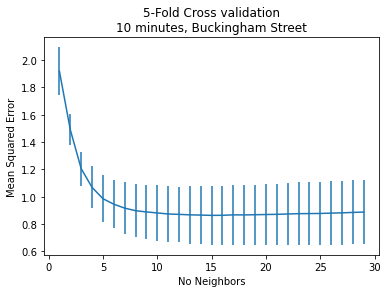

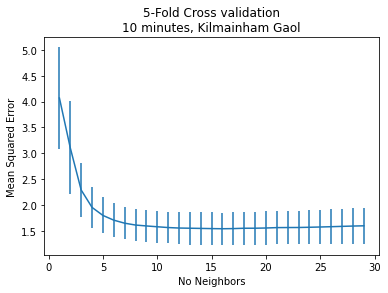

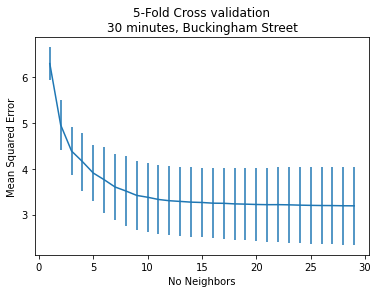

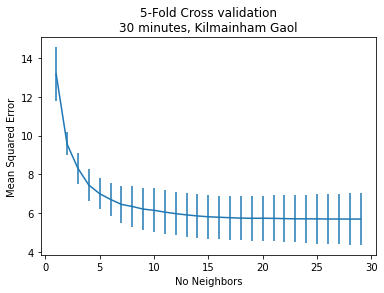

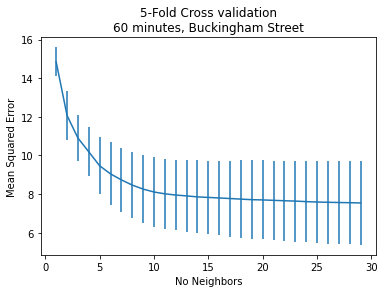

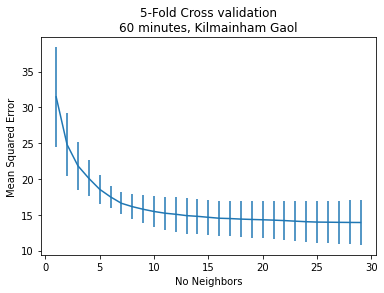

In [46]:
ns = range(1,30)
Kfold_for_n_neighbours(X1, Y1, ns, title = '5-Fold Cross validation\n10 minutes, Buckingham Street')
Kfold_for_n_neighbours(X2, Y2, ns, title = '5-Fold Cross validation\n10 minutes, Kilmainham Gaol')
Kfold_for_n_neighbours(X3, Y3, ns, title = '5-Fold Cross validation\n30 minutes, Buckingham Street')
Kfold_for_n_neighbours(X4, Y4, ns, title = '5-Fold Cross validation\n30 minutes, Kilmainham Gaol')
Kfold_for_n_neighbours(X5, Y5, ns, title = '5-Fold Cross validation\n60 minutes, Buckingham Street')
Kfold_for_n_neighbours(X6, Y6, ns, title = '5-Fold Cross validation\n60 minutes, Kilmainham Gaol')

In [47]:
# leafs = range(10,200,10)
# Kfold_for_leaf_size(X1, Y1, leafs, title = '5-Fold Cross validation\n10 minutes, Buckingham Street')
# Kfold_for_leaf_size(X2, Y2, leafs, title = '5-Fold Cross validation\n10 minutes, Kilmainham Gaol')
# Kfold_for_leaf_size(X3, Y3, leafs, title = '5-Fold Cross validation\n30 minutes, Buckingham Street')
# Kfold_for_leaf_size(X4, Y4, leafs, title = '5-Fold Cross validation\n30 minutes, Kilmainham Gaol')
# Kfold_for_leaf_size(X5, Y5, leafs, title = '5-Fold Cross validation\n60 minutes, Buckingham Street')
# Kfold_for_leaf_size(X6, Y6, leafs, title = '5-Fold Cross validation\n60 minutes, Kilmainham Gaol')

In [48]:
# ps = range(1,20)
# Kfold_for_leaf_size(X1, Y1, ps, title = '5-Fold Cross validation\n10 minutes, Buckingham Street')
# Kfold_for_leaf_size(X2, Y2, ps, title = '5-Fold Cross validation\n10 minutes, Kilmainham Gaol')
# Kfold_for_leaf_size(X3, Y3, ps, title = '5-Fold Cross validation\n30 minutes, Buckingham Street')
# Kfold_for_leaf_size(X4, Y4, ps, title = '5-Fold Cross validation\n30 minutes, Kilmainham Gaol')
# Kfold_for_leaf_size(X5, Y5, ps, title = '5-Fold Cross validation\n60 minutes, Buckingham Street')
# Kfold_for_leaf_size(X6, Y6, ps, title = '5-Fold Cross validation\n60 minutes, Kilmainham Gaol')

In [49]:
n = 10

model1 = KNeighborsRegressor(n_neighbors=n).fit(X1_train,y1_train)
predictions1 = ml.generate_predictions(model1, X1_test)
mse1 = mtr.calculate_mse(predictions1,y1_test)
train_predictions1 = ml.generate_predictions(model1, X1_train)
train_mse1 = mtr.calculate_mse(train_predictions1,y1_train)

model2 = KNeighborsRegressor(n_neighbors=n).fit(X2_train,y2_train)
predictions2 = ml.generate_predictions(model2, X2_test)
mse2 = mtr.calculate_mse(predictions2,y2_test)
train_predictions2 = ml.generate_predictions(model2, X2_train)
train_mse2 = mtr.calculate_mse(train_predictions2,y2_train)

model3 = KNeighborsRegressor(n_neighbors=n).fit(X3_train,y3_train)
predictions3 = ml.generate_predictions(model3, X3_test)
mse3 = mtr.calculate_mse(predictions3,y3_test)
train_predictions3 = ml.generate_predictions(model3, X3_train)
train_mse3 = mtr.calculate_mse(train_predictions3,y3_train)

model4 = KNeighborsRegressor(n_neighbors=n).fit(X4_train,y4_train)
predictions4 = ml.generate_predictions(model4, X4_test)
mse4 = mtr.calculate_mse(predictions4,y4_test)
train_predictions4 = ml.generate_predictions(model4, X4_train)
train_mse4 = mtr.calculate_mse(train_predictions4,y4_train)

model5 = KNeighborsRegressor(n_neighbors=n).fit(X5_train,y5_train)
predictions5 = ml.generate_predictions(model5, X5_test)
mse5 = mtr.calculate_mse(predictions5,y5_test)
train_predictions5 = ml.generate_predictions(model5, X5_train)
train_mse5 = mtr.calculate_mse(train_predictions5,y5_train)

model6 = KNeighborsRegressor(n_neighbors=n).fit(X6_train,y6_train)
predictions6 = ml.generate_predictions(model6, X6_test)
mse6 = mtr.calculate_mse(predictions6,y6_test)
train_predictions6 = ml.generate_predictions(model6, X6_train)
train_mse6 = mtr.calculate_mse(train_predictions6,y6_train)

In [50]:
print(f"mse 1: {mse1}, training mse = {train_mse1}")
print(f"mse 2: {mse2}, training mse = {train_mse2}")
print(f"mse 3: {mse3}, training mse = {train_mse3}")
print(f"mse 4: {mse4}, training mse = {train_mse4}")
print(f"mse 5: {mse5}, training mse = {train_mse5}")
print(f"mse 6: {mse6}, training mse = {train_mse6}")

mse 1: 0.8859025203854707, training mse = 0.6406934625466678
mse 2: 1.4358914010378059, training mse = 1.172645960759393
mse 3: 2.8013104726598703, training mse = 2.1465541077387575
mse 4: 4.700550509731233, training mse = 4.0173232162720485
mse 5: 6.684765436677175, training mse = 4.731316960737562
mse 6: 11.495384758019656, training mse = 8.871771578445399


In [51]:
dummy_preds_1 = X1_test[:,8]
dummy_mse_1 = mtr.calculate_mse(dummy_preds_1,y1_test)
dummy_r21 = mtr.calculate_R2(dummy_preds_1,y1_test)
dummy_preds_2 = X2_test[:,8]
dummy_mse_2 = mtr.calculate_mse(dummy_preds_2,y2_test)
dummy_r22 = mtr.calculate_R2(dummy_preds_2,y2_test)
dummy_preds_3 = X3_test[:,8]
dummy_mse_3 = mtr.calculate_mse(dummy_preds_3,y3_test)
dummy_r23 = mtr.calculate_R2(dummy_preds_3,y3_test)
dummy_preds_4 = X4_test[:,8]
dummy_mse_4 = mtr.calculate_mse(dummy_preds_4,y4_test)
dummy_r24 = mtr.calculate_R2(dummy_preds_4,y4_test)
dummy_preds_5 = X5_test[:,8]
dummy_mse_5 = mtr.calculate_mse(dummy_preds_5,y5_test)
dummy_r25 = mtr.calculate_R2(dummy_preds_5,y5_test)
dummy_preds_6 = X6_test[:,8]
dummy_mse_6 = mtr.calculate_mse(dummy_preds_6,y6_test)
dummy_r26 = mtr.calculate_R2(dummy_preds_6,y6_test)

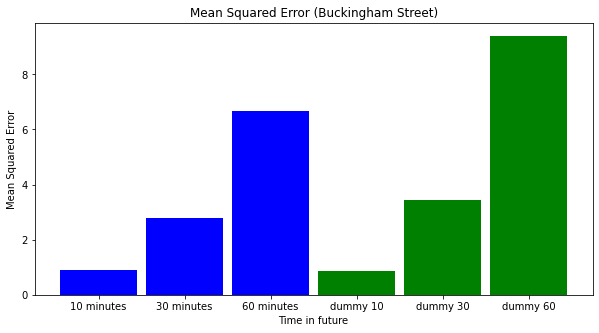

In [52]:
data1 = {'10 minutes':mse1, '30 minutes':mse3, '60 minutes':mse5}
data2 = {'dummy 10':dummy_mse_1, 'dummy 30':dummy_mse_3, 'dummy 60':dummy_mse_5}
keys1 = list(data1.keys())
values1 = list(data1.values())
keys2 = list(data2.keys())
values2 = list(data2.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(keys1, values1, color ='blue',
        width = 0.9)

plt.bar(keys2, values2, color ='green',
        width = 0.9)

plt.xlabel("Time in future")
plt.ylabel("Mean Squared Error")
plt.title("Mean Squared Error (Buckingham Street)")
plt.show()

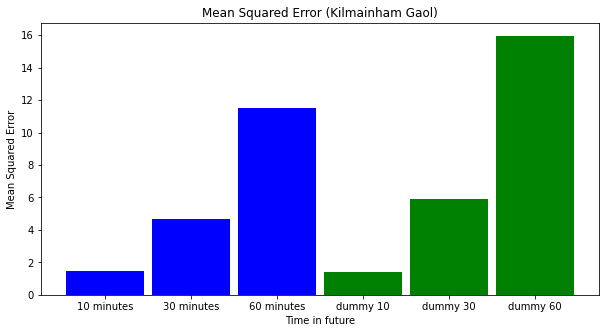

In [53]:
data1 = {'10 minutes':mse2, '30 minutes':mse4, '60 minutes':mse6}
data2 = {'dummy 10':dummy_mse_2, 'dummy 30':dummy_mse_4, 'dummy 60':dummy_mse_6}
keys1 = list(data1.keys())
values1 = list(data1.values())
keys2 = list(data2.keys())
values2 = list(data2.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(keys1, values1, color ='blue',
        width = 0.9)

plt.bar(keys2, values2, color ='green',
        width = 0.9)

plt.xlabel("Time in future")
plt.ylabel("Mean Squared Error")
plt.title("Mean Squared Error (Kilmainham Gaol)")
plt.show()

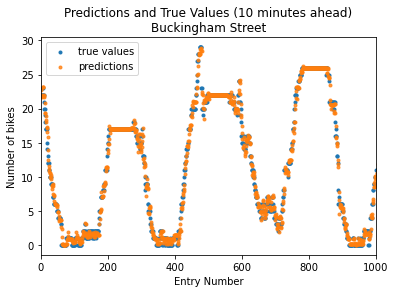

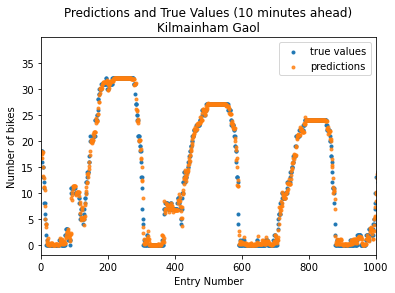

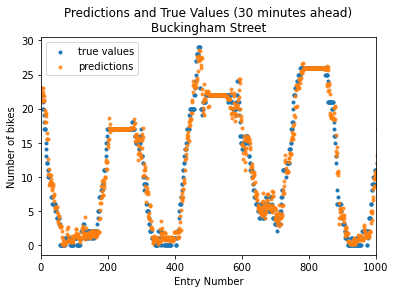

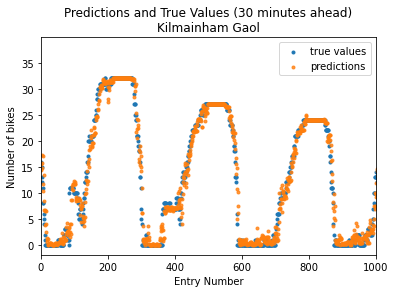

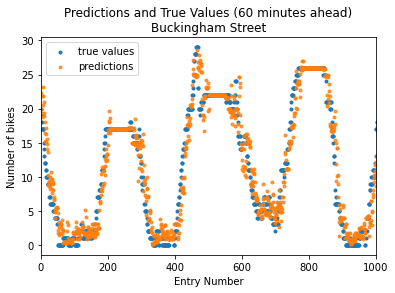

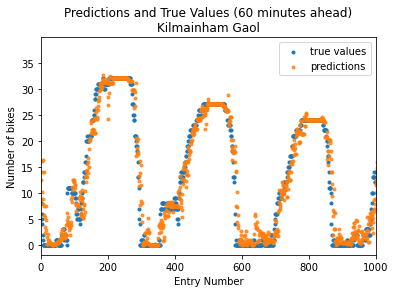

In [54]:
plt.figure('preds1')
preds = ml.generate_predictions(model1, X1)
x = range(len(preds))
plt.scatter(x,Y1, label= 'true values', marker = '.' )
plt.scatter(x,preds, label= 'predictions', alpha = 0.8, marker = '.')
plt.title('Predictions and True Values (10 minutes ahead)\nBuckingham Street')
plt.xlabel('Entry Number')
plt.ylabel('Number of bikes')
pylab.xlim(0, 1000)
plt.legend()

plt.figure('preds2')
preds = ml.generate_predictions(model2, X2)
x = range(len(preds))
plt.scatter(x,Y2, label= 'true values', marker = '.' )
plt.scatter(x,preds, label= 'predictions', alpha = 0.8, marker = '.')
plt.title('Predictions and True Values (10 minutes ahead)\nKilmainham Gaol')
plt.xlabel('Entry Number')
plt.ylabel('Number of bikes')
pylab.xlim(0, 1000)
plt.legend()

plt.figure('preds3')
preds = ml.generate_predictions(model3, X3)
x = range(len(preds))
plt.scatter(x,Y3, label= 'true values', marker = '.' )
plt.scatter(x,preds, label= 'predictions', alpha = 0.8, marker = '.')
plt.title('Predictions and True Values (30 minutes ahead)\nBuckingham Street')
plt.xlabel('Entry Number')
plt.ylabel('Number of bikes')
pylab.xlim(0, 1000)
plt.legend()

plt.figure('preds4')
preds = ml.generate_predictions(model4, X4)
x = range(len(preds))
plt.scatter(x,Y4, label= 'true values', marker = '.' )
plt.scatter(x,preds, label= 'predictions', alpha = 0.8, marker = '.')
plt.title('Predictions and True Values (30 minutes ahead)\nKilmainham Gaol')
plt.xlabel('Entry Number')
plt.ylabel('Number of bikes')
pylab.xlim(0, 1000)
plt.legend()

plt.figure('preds5')
preds = ml.generate_predictions(model5, X5)
x = range(len(preds))
plt.scatter(x,Y5, label= 'true values', marker = '.' )
plt.scatter(x,preds, label= 'predictions', alpha = 0.8, marker = '.')
plt.title('Predictions and True Values (60 minutes ahead)\nBuckingham Street')
plt.xlabel('Entry Number')
plt.ylabel('Number of bikes')
pylab.xlim(0, 1000)
plt.legend()

plt.figure('preds6')
preds = ml.generate_predictions(model6, X6)
x = range(len(preds))
plt.scatter(x,Y6, label= 'true values', marker = '.' )
plt.scatter(x,preds, label= 'predictions', alpha = 0.8, marker = '.')
plt.title('Predictions and True Values (60 minutes ahead)\nKilmainham Gaol')
plt.xlabel('Entry Number')
plt.ylabel('Number of bikes')
pylab.xlim(0, 1000)
plt.legend()

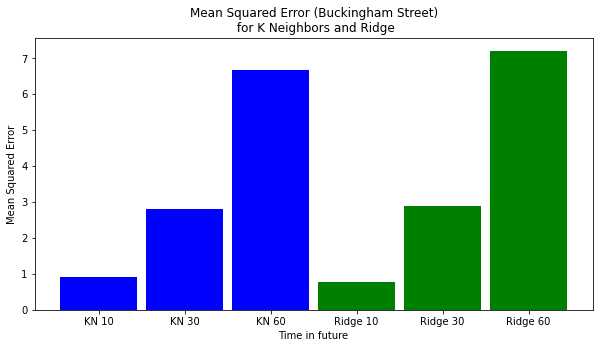

In [69]:
data1 = {'KN 10':mse1, 'KN 30':mse3, 'KN 60':mse5}
data2 = {'Ridge 10':0.778038465888961, 'Ridge 30':2.8980902949976604, 'Ridge 60':7.206380333828185}
keys1 = list(data1.keys())
values1 = list(data1.values())
keys2 = list(data2.keys())
values2 = list(data2.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(keys1, values1, color ='blue',
        width = 0.9)

plt.bar(keys2, values2, color ='green',
        width = 0.9)

plt.xlabel("Time in future")
plt.ylabel("Mean Squared Error")
plt.title("Mean Squared Error (Buckingham Street)\n for K Neighbors and Ridge")
plt.show()

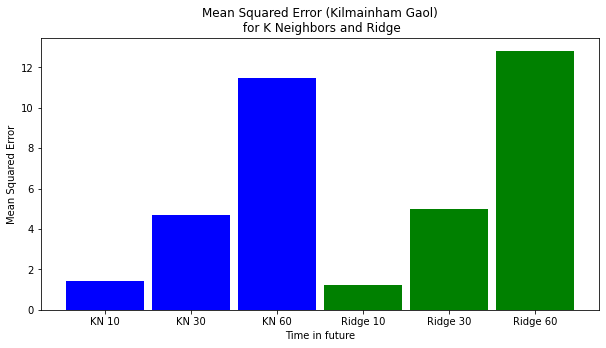

In [68]:
data1 = {'KN 10':mse2, 'KN 30':mse4, 'KN 60':mse6}
data2 = {'Ridge 10':1.2274603642388036, 'Ridge 30':5.009085323957655, 'Ridge 60':12.814869517454902}
keys1 = list(data1.keys())
values1 = list(data1.values())
keys2 = list(data2.keys())
values2 = list(data2.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(keys1, values1, color ='blue',
        width = 0.9)

plt.bar(keys2, values2, color ='green',
        width = 0.9)

plt.xlabel("Time in future")
plt.ylabel("Mean Squared Error")
plt.title("Mean Squared Error (Kilmainham Gaol)\n for K Neighbors and Ridge")
plt.show()